<center style="font-size:32px">IRIS FLOWER project</center>

<h1 style="font-size:20px">Importing Librairies & Packages :</h1>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import learning_curve

<h1 style="font-size:20px">Reading and spliting the data into train-test :</h1>

In [4]:
irisflower = pd.read_csv("IRIS_ Flower_Dataset.csv")

Text(0.5, 1.0, 'Number of flower in different species')

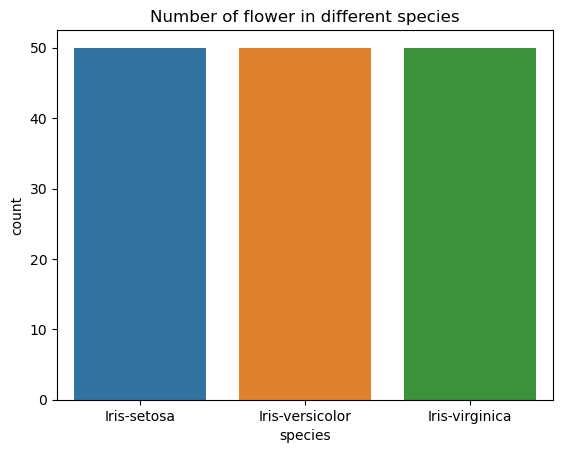

In [18]:
irisflower.head()
irisflower.shape
irisflower.columns
irisflower.describe()
sns.countplot(x='species', data=irisflower)
plt.title('Number of flower in different species')

#### <span style="front-size: 22pt"> We have 150 iris flowers, 50 Iris-setosa, 50 Iris-versicolor and 50 Iris-virginica. </span>

<h1 style="font-size:20px">Cleaning the data :</h1>

In [6]:
irisflower.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

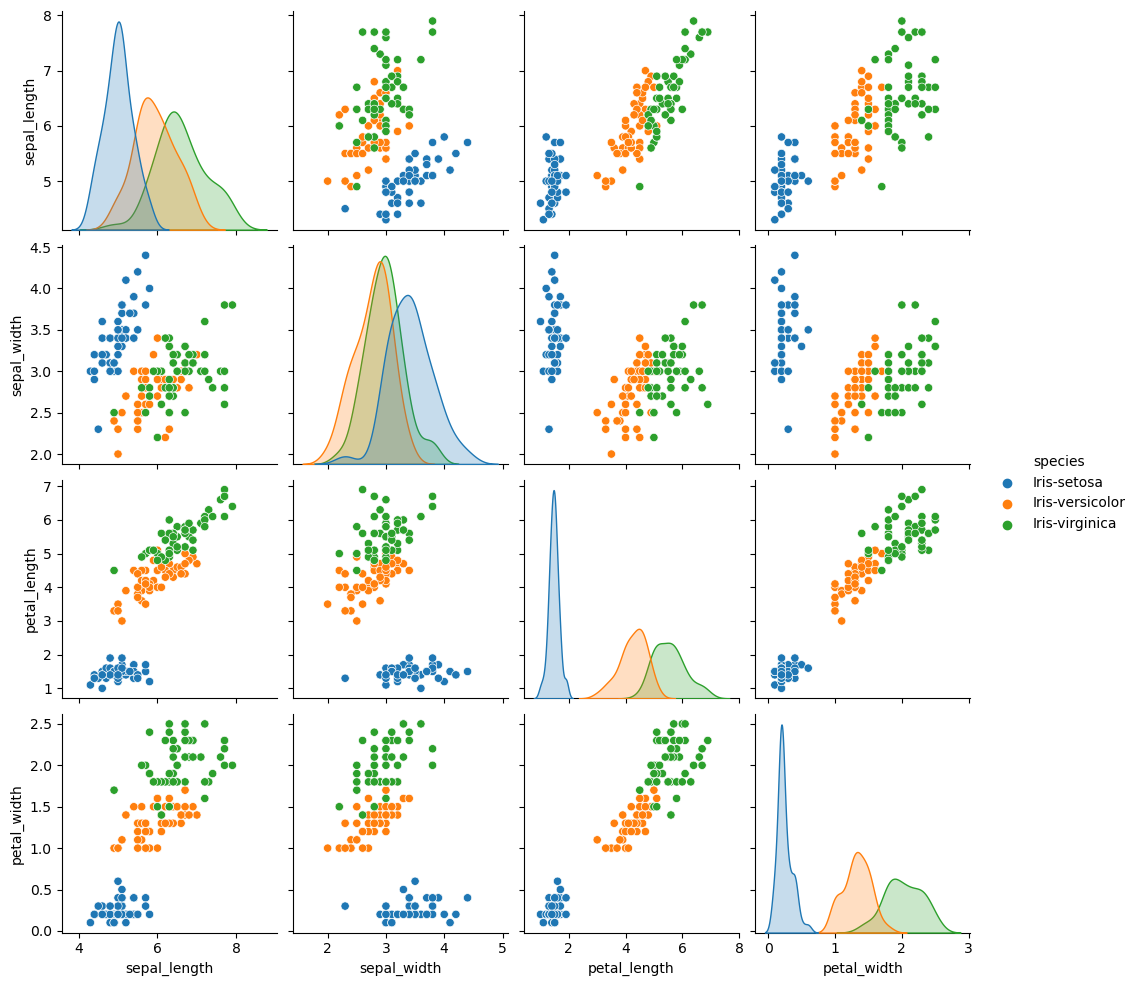

In [7]:
sns.pairplot(irisflower, hue='species')

<h1 style="font-size:20px">Spliting the data into train-test :</h1>

In [9]:
X = irisflower.drop('species', axis=1)
y = irisflower['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h1 style="font-size:20px">Build the model :</h1>

In [10]:
svm = SVC(kernel='rbf',C=1,gamma='auto')
svm.fit(X_train, y_train)


SVC(C=1, gamma='auto')

<h1 style="font-size:20px">Evaluating the model :</h1>

SVM Model accuracy on train set: 0.9916666666666667
SVM classification report on test set :                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

SVM Model accuracy on test set: 1.0


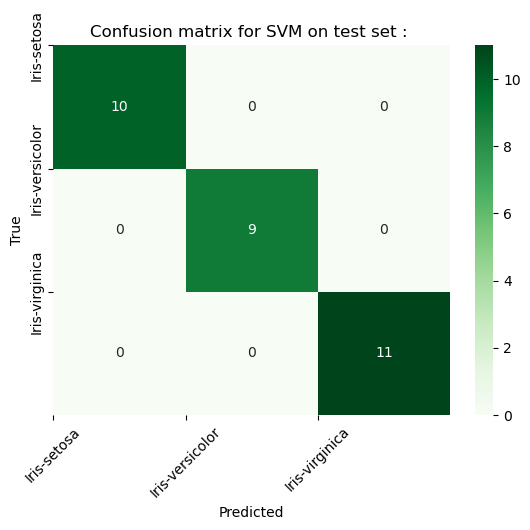

In [11]:
svm.fit(X_train, y_train)
print("SVM Model accuracy on train set:", svm.score(X_train, y_train))
y_pred = svm.predict(X_test)
mconf=confusion_matrix(y_test, y_pred)
print("SVM classification report on test set : ",classification_report(y_test, y_pred))

print("SVM Model accuracy on test set:", svm.score(X_test, y_test))

plt.title('Confusion matrix for SVM on test set : ')
sns.heatmap(mconf,annot=True,cmap='Greens')

mark_side = np.arange(len(y.unique()))
plt.xticks(mark_side, y.unique(), rotation=45)
plt.yticks(mark_side, y.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

[ 9 19 28 38 48 57 67 76 86 96]


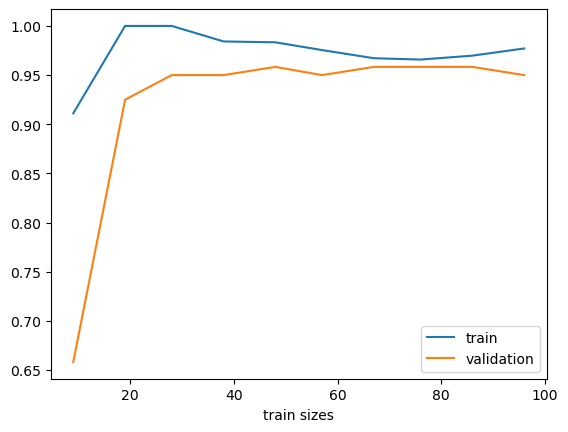

In [20]:
N,train_score, val_score = learning_curve(svm, X_train,y_train,train_sizes = np.linspace(0.1,1,10), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1),label='validation')
plt.xlabel('train sizes')
plt.legend()
plt.savefig('graph.png')